In [1]:
import pandas as pd
import pickle
import numpy as np

In [10]:
with open('/content/drive/MyDrive/datasets/ps_split_data_dict.pickle', 'rb') as file:
    data_dict = pickle.load(file)

In [3]:
X_train, X_val, X_holdout = data_dict['X_train'], data_dict['X_val'], data_dict['X_holdout']

In [4]:
y_train, y_val, y_holdout = data_dict['y_train'], data_dict['y_val'], data_dict['y_holdout']

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

In [30]:
%run /content/drive/MyDrive/Colab\ Notebooks/common_functions.ipynb

In [7]:
randomforest = RandomForestClassifier(n_estimators=100)

fit_and_score(randomforest, X_train, y_train, X_val, y_val)

Recall: 0.000 
Precision: 0.000
F1: 0.000 
Accuracy: 0.963 
ROC AUC: 0.585


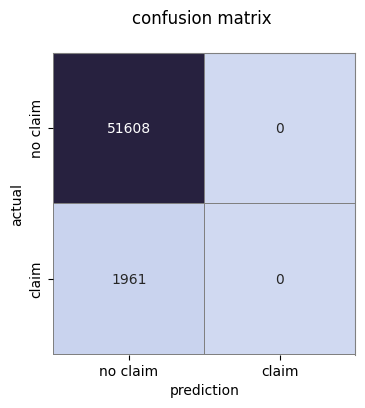

In [9]:
confusion_diagram(X_val, y_val, randomforest)

ROC AUC score =  0.5787440176844846


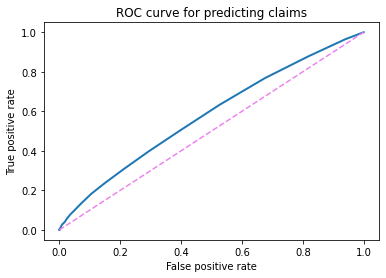

In [9]:
roc_diagram(X_val, y_val, randomforest)

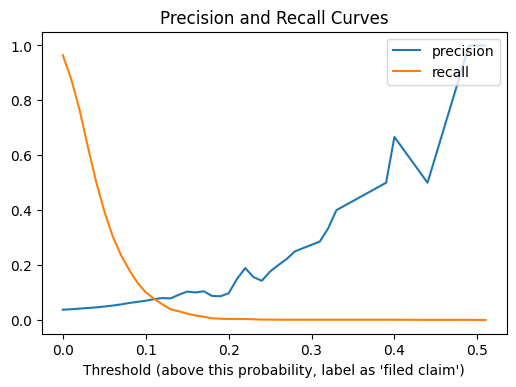

In [10]:
precision_recall_diagram(X_val, y_val, randomforest)

ROC AUC score =  0.5787440176844846


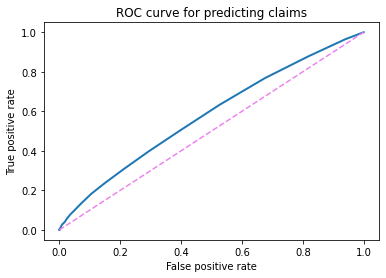

In [11]:
roc_diagram(X_val, y_val, randomforest)

Best F1 score 0.093 at prob decision threshold >= 0.080


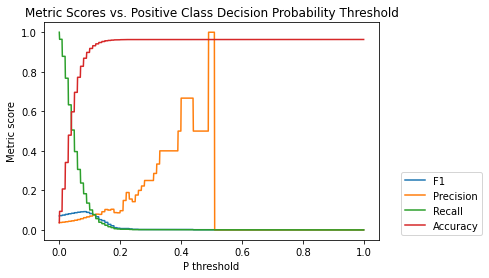

In [12]:
threshold_diagram(X_val, y_val, randomforest)

In [13]:
randomforest2 = RandomForestClassifier(class_weight="balanced")

fit_and_score(randomforest2, X_train, y_train, X_val, y_val)

Recall: 0.001 
Precision: 1.000
F1: 0.001 
Accuracy: 0.963 
ROC AUC: 0.587


In [12]:
decisiontree = DecisionTreeClassifier(max_depth=10)

fit_and_score(decisiontree, X_train, y_train, X_val, y_val)

Recall: 0.003 
Precision: 0.171
F1: 0.006 
Accuracy: 0.963 
ROC AUC: 0.614


Percent claims in predicted no claim group: 3.65% 
Percent claims in predicted claim group: 17.14% 

Av payout per low risk member: $255.63 
Av payout per high risk member: $1200.00 

Total Policies: 53569.00 
Total Claims: 1961.00 
Overall Percent claims 3.66%




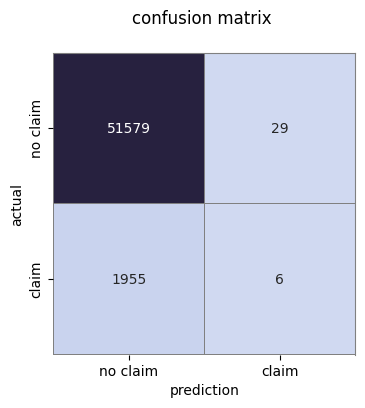

In [31]:
confusion_diagram(X_val, y_val, decisiontree)

ROC AUC score =  0.6145369209743464


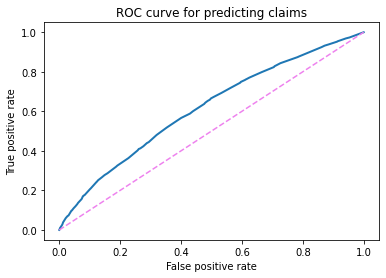

In [16]:
roc_diagram(X_val, y_val, decisiontree)

Best F1 score 0.109 at prob decision threshold >= 0.055


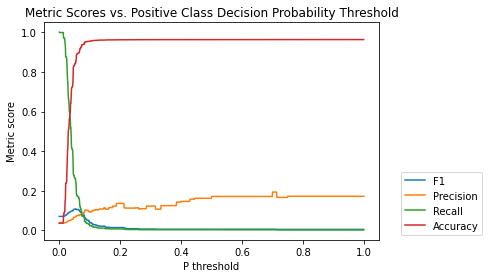

In [20]:
threshold_diagram(X_val, y_val, decisiontree)

In [19]:
y_pred = (decisiontree.predict_proba(X_val)[:,1] >= 0.055)

Percent claims in predicted no claim group: 3.18% 
Percent claims in predicted claim group: 6.99% 

Av payout per low risk member: $222.37 
Av payout per high risk member: $489.55 

Total Policies: 53569.00 
Total Claims: 1961.00 
Overall Percent claims 3.66%




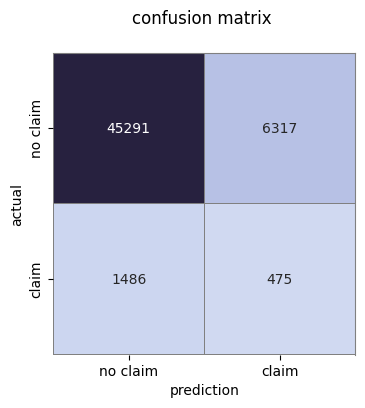

In [32]:
confusion_diagram_simple(y_val, y_pred)

In [22]:
y_pred2 = (decisiontree.predict_proba(X_val)[:,1] >= 0.035)

Percent claims in predicted no claim group: 2.68% 
Percent claims in predicted claim group: 5.10% 

Av payout per low risk member: $187.39 
Av payout per high risk member: $356.75 

Total Policies: 53569.00 
Total Claims: 1961.00 
Overall Percent claims 3.66%




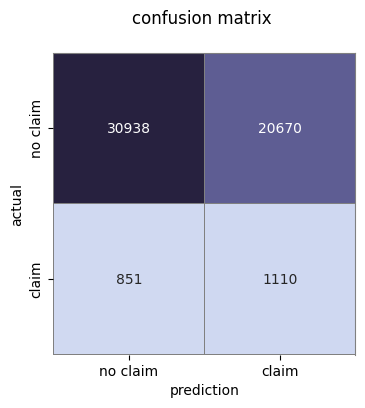

In [33]:
confusion_diagram_simple(y_val, y_pred2)

In [24]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [25]:
fit_and_score(xgb, X_train, y_train, X_val, y_val)

Recall: 0.000 
Precision: 0.000
F1: 0.000 
Accuracy: 0.963 
ROC AUC: 0.638


Best F1 score 0.120 at prob decision threshold >= 0.059


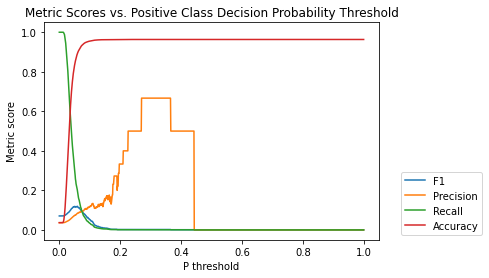

In [24]:
threshold_diagram(X_val, y_val, xgb)

Percent claims in predicted no claim group: 2.48% 
Percent claims in predicted claim group: 5.25% 

Av payout per low risk member: $173.50 
Av payout per high risk member: $367.71 

Total Policies: 53569.00 
Total Claims: 1961.00 
Overall Percent claims 3.66%




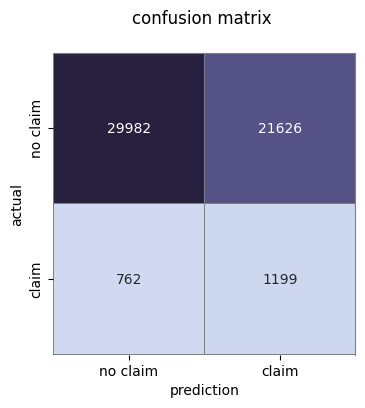

In [34]:
y_pred3 = (xgb.predict_proba(X_val)[:,1] >= 0.035)
confusion_diagram_simple(y_val, y_pred3)

In [26]:
eval_gini(y_val, xgb.predict_proba(X_val)[:,1])

0.27625859349549986

In [27]:
eval_gini(y_val, decisiontree.predict_proba(X_val)[:,1])

0.22903773640239833

In [32]:
with open('/content/drive/MyDrive/datasets/decisiontree.pickle', 'wb') as file:
    pickle.dump(decisiontree, file)

In [33]:
with open('/content/drive/MyDrive/datasets/randomforest.pickle', 'wb') as file:
    pickle.dump(randomforest, file)

In [34]:
with open('/content/drive/MyDrive/datasets/randomforest2.pickle', 'wb') as file:
    pickle.dump(randomforest2, file)